In [209]:
# TODO: short markdown readme on what this notebook does

In [210]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import json
import seaborn as sns

# if looking for a particular export: provide name in format 'res_YYYY_MM_DD_THH_MM_SS'
RESULTS_DIR = None

In [211]:
# calculate last export generated if none is specified, read in files
if RESULTS_DIR == None:
    dir_list = next(os.walk('results/'))[1]
    RESULTS_DIR = max(dir_list)

full_path        = f'results/{RESULTS_DIR}/'
correctness_dump = f'{full_path}/results_correctness.json'
times_dump       = f'{full_path}/results_times.json'

print('Reading from results folder:', full_path)

Reading from results folder: results/res_2024_03_04_T22_37_40/


In [212]:
def json_to_df(path):
  # unzip the file, load in each line as an object
  g = open(path, 'rb')
  g = [json.loads(l) for l in g]

  # map to a dictionary, then load in as a dataframe
  dict_df = {i: d for (i, d) in enumerate(g)}
  return pd.DataFrame.from_dict(dict_df, orient='index')

times_df       = json_to_df(times_dump)
correctness_df = json_to_df(correctness_dump)

correctness_df.head()

,adjusted_mutual_info_score,adjusted_rand_score,completeness_score,experiment,homogeneity_score,n_points,noise,normalized_mutual_info_score,timed_out,v_measure_score,variant
0,0.833543,0.882417,0.835851,DEFAULT,0.833679,100,0.0,0.834764,False,0.834764,DEFAULT
1,0.833543,0.882417,0.835851,DEFAULT,0.833679,100,0.0,0.834764,False,0.834764,DEFAULT
2,0.928602,0.959996,0.929259,DEFAULT,0.928991,100,0.0,0.929125,False,0.929125,DEFAULT
3,0.652002,0.755672,0.653291,DEFAULT,0.653244,200,0.0,0.653267,False,0.653267,DEFAULT
4,0.691912,0.791050,0.693057,DEFAULT,0.693007,200,0.0,0.693032,False,0.693032,DEFAULT


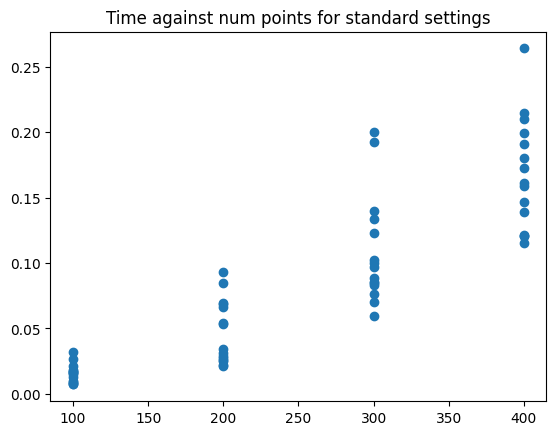

In [213]:
standard_results = times_df[times_df['experiment'] == 'DEFAULT']
plt.title('Time against num points for standard settings')
plt.scatter(standard_results['n_points'], standard_results['time'])

In [214]:
# TODO: add basic set of plots for set of results (correctness/time), from selected(or last) result report

In [215]:
def col_map(lst):
    vals = list(set(lst))
    mp   = {v:i for (i, v) in enumerate(vals)}
    print(mp)
    return [mp[v] for v in lst]

,experiment,n_points,noise,time,timed_out,variant
96,Decomposition,100,0.15,0.017265,False,dense
97,Decomposition,100,0.15,0.010900,False,dense
98,Decomposition,100,0.15,0.004789,False,dense
99,Decomposition,200,0.15,0.042642,False,dense
100,Decomposition,200,0.15,0.078775,False,dense


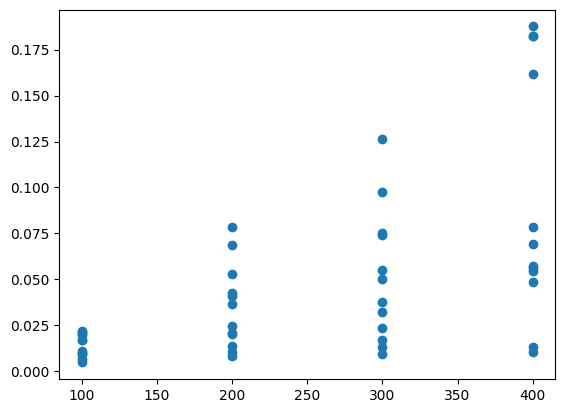

In [216]:
test = times_df[(times_df['experiment'] == 'Decomposition') & (times_df['noise'] == 0.15)]
display(test.head())

plt.scatter(test['n_points'], test['time'])

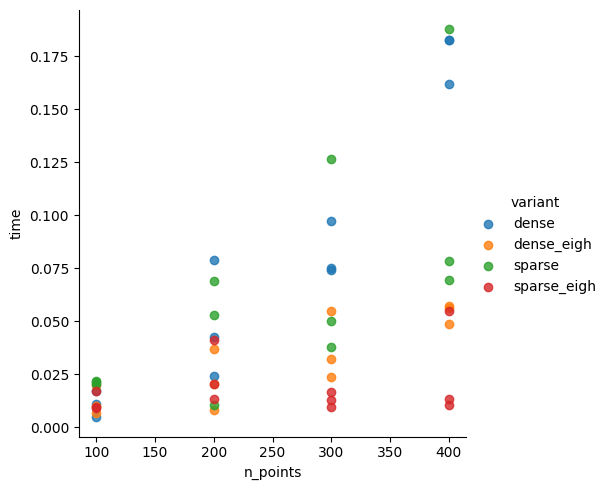

In [217]:
sns.lmplot( x="n_points", y="time", data=test, fit_reg=False, hue='variant', legend=True)

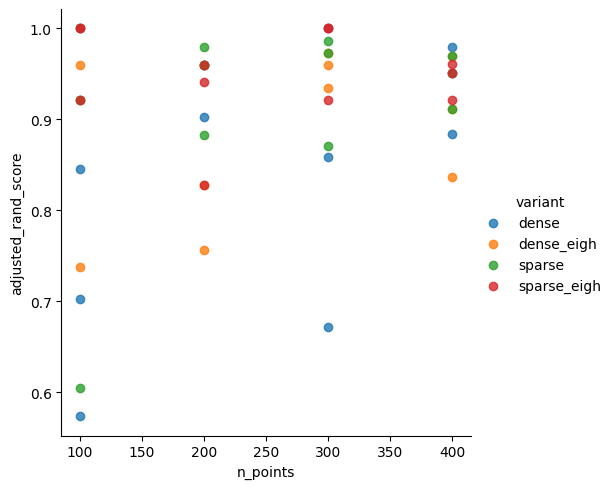

In [218]:
test = correctness_df[(correctness_df['experiment'] == 'Decomposition') & (correctness_df['noise'] == 0.15)]
sns.lmplot( x="n_points", y="adjusted_rand_score", data=test, fit_reg=False, hue='variant', legend=True)